In [194]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.12.04/squat/suqat_norm_main.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.12.04/squat/suqat_norm_main _drop.xlsx")


In [195]:
data_main

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),FSR_B(Right),FSR_C(Left)
0,0,0.911330,0.948454,0.741935,1.000000
1,1,0.901478,0.955326,0.806452,1.000000
2,2,1.000000,1.000000,0.903226,0.961538
3,3,0.866995,0.958763,0.935484,0.807692
4,4,0.822660,0.890034,0.935484,0.730769
...,...,...,...,...,...
872,872,0.000000,0.151203,0.612903,0.269231
873,873,0.068966,0.175258,0.645161,0.192308
874,874,0.059113,0.168385,0.645161,0.115385
875,875,0.000000,0.161512,0.580645,0.153846


In [196]:
data

,Unnamed: 0,FORCE_B(Right),FORCE_C(Left),FSR_B(Right),FSR_C(Left)
0,0.0,0.911330,0.948454,0.741935,1.000000
1,1.0,0.901478,0.955326,0.806452,1.000000
2,2.0,1.000000,1.000000,0.903226,0.961538
3,3.0,0.866995,0.958763,0.935484,0.807692
4,4.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
872,872.0,NaN,NaN,NaN,NaN
873,873.0,0.068966,0.175258,0.645161,0.192308
874,874.0,0.059113,0.168385,0.645161,0.115385
875,875.0,NaN,NaN,NaN,NaN


In [197]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

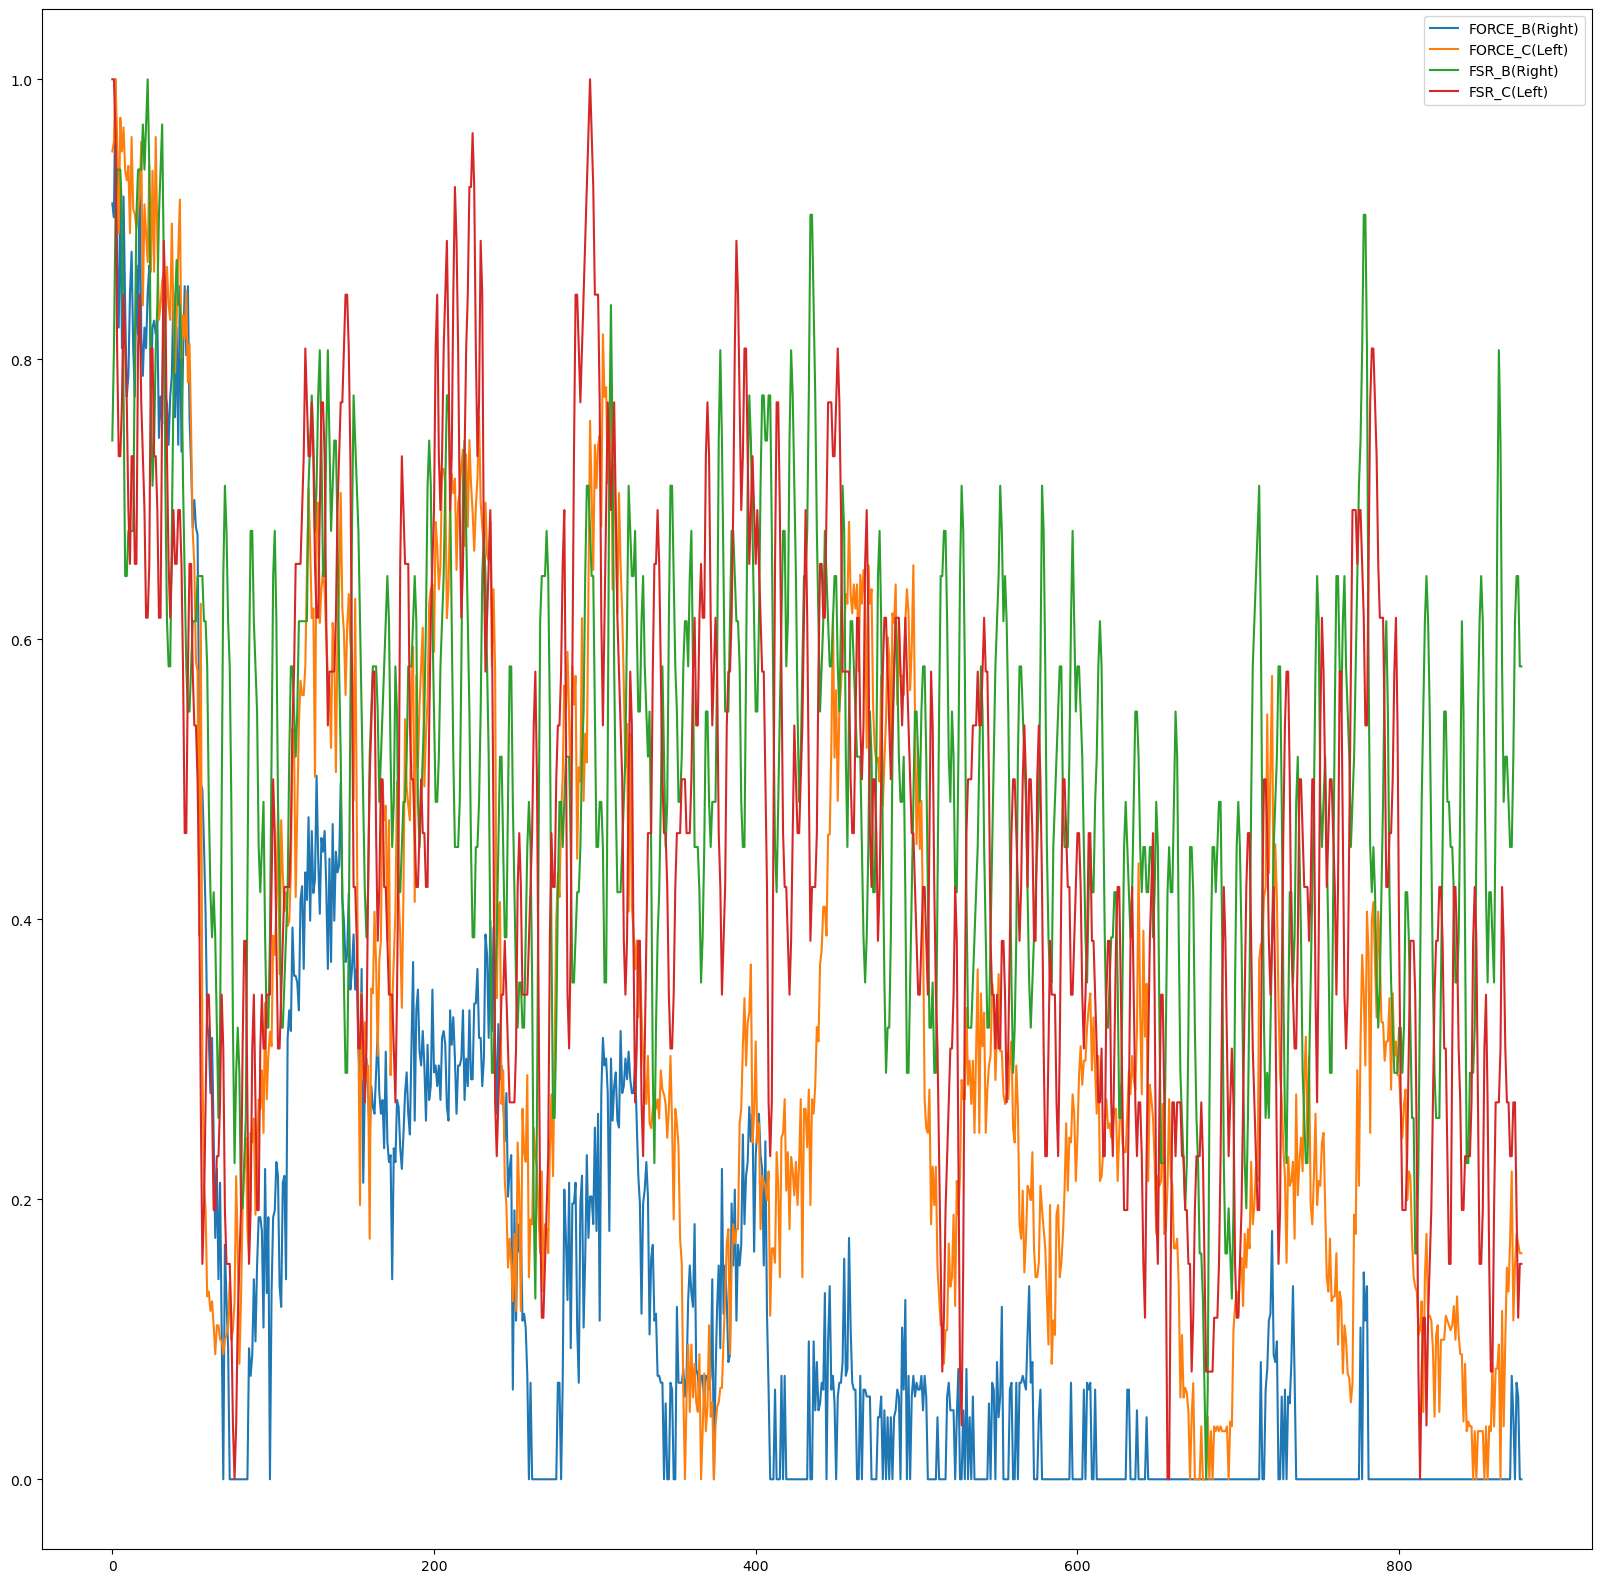

In [198]:
data_main.plot(figsize=(20,20))

<Axes: >

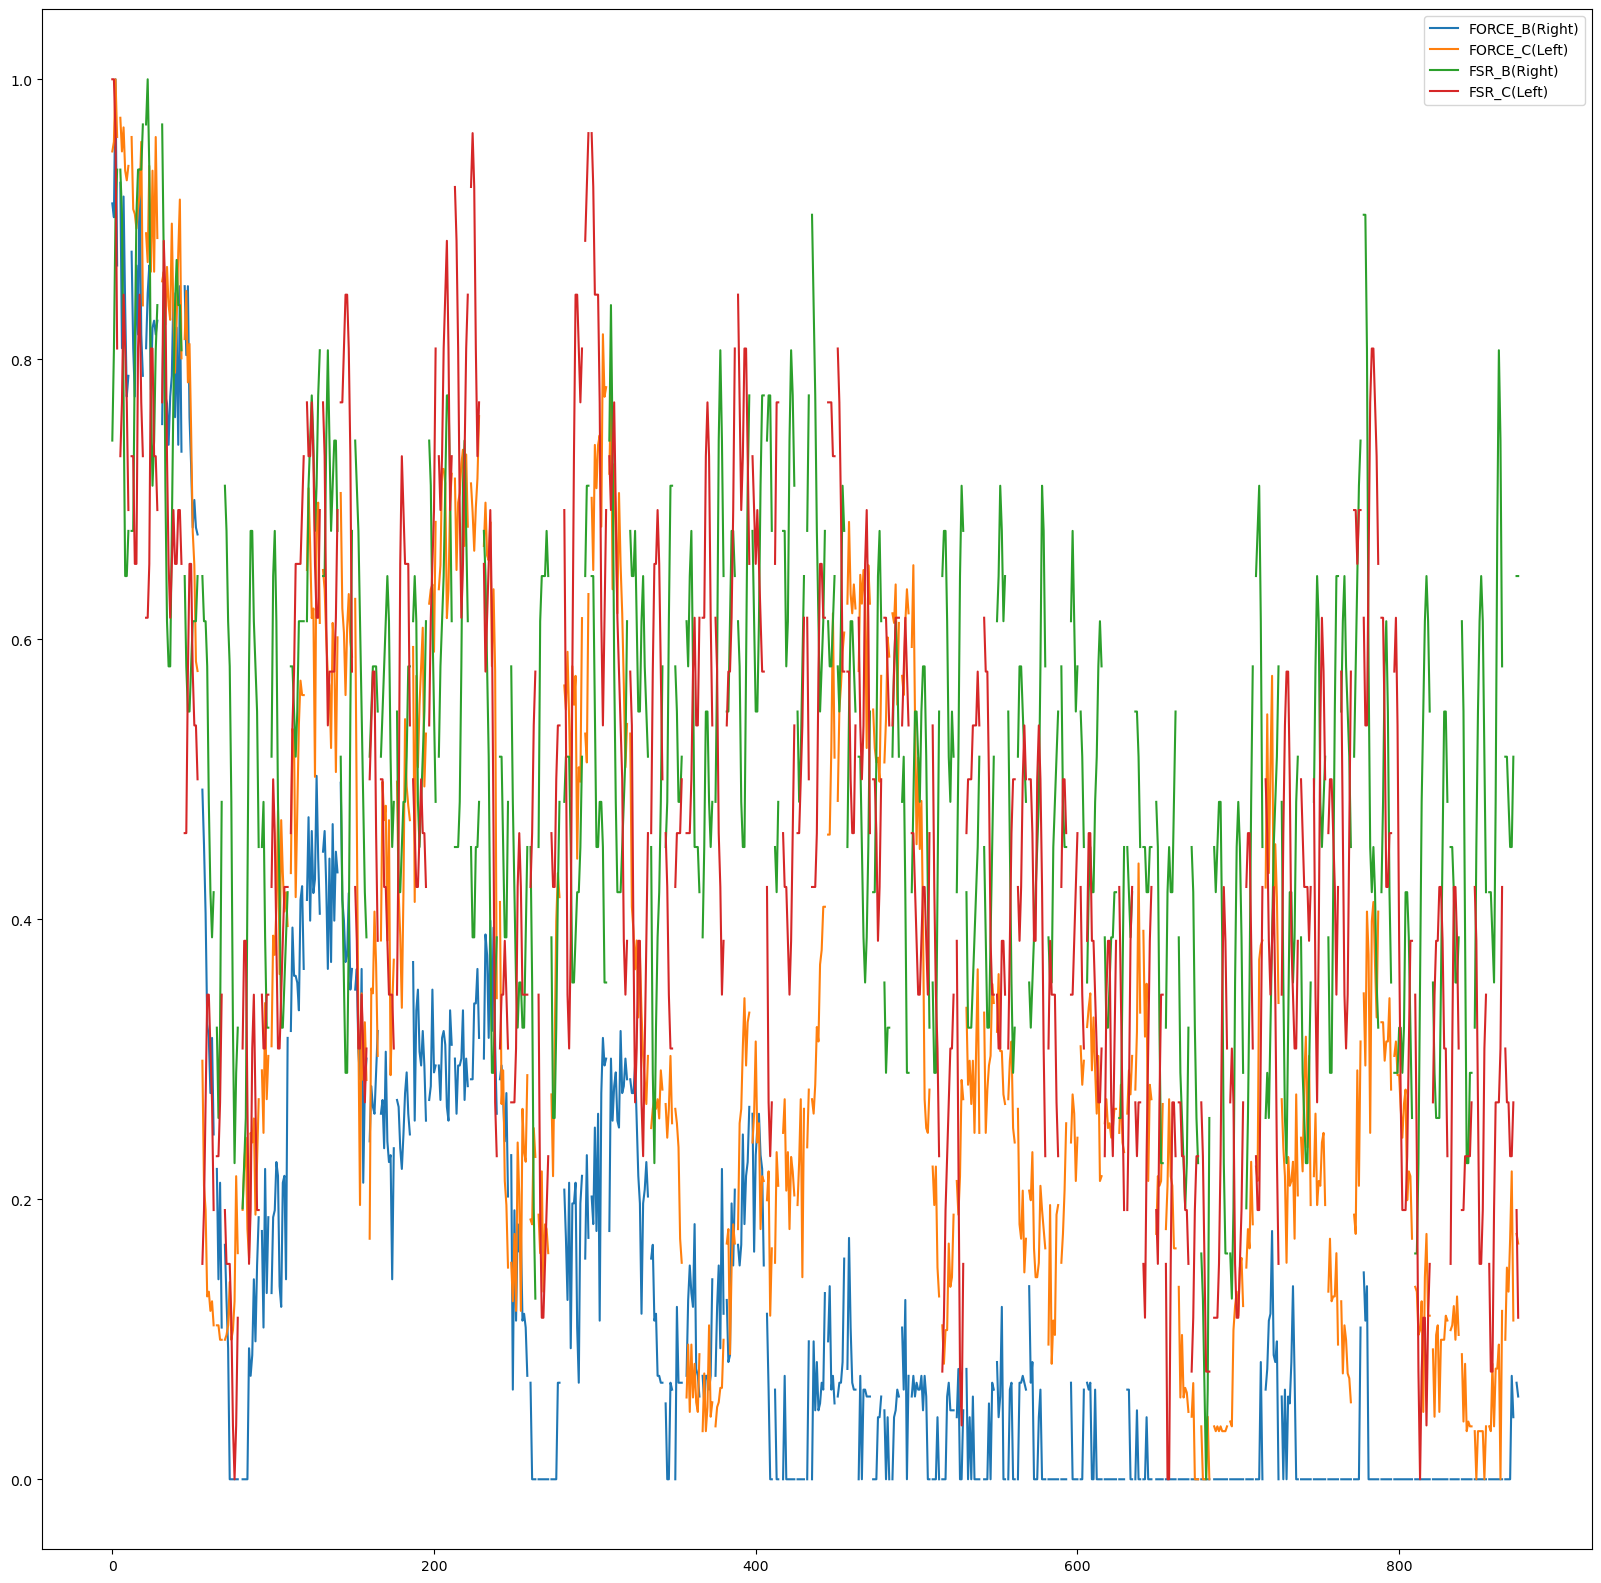

In [199]:
data.plot(figsize=(20,20))

In [200]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)    117
FORCE_C(Left)     117
FSR_B(Right)      117
FSR_C(Left)       117
dtype: int64
FORCE_B(Right)    0
FORCE_C(Left)     0
FSR_B(Right)      0
FSR_C(Left)       0
dtype: int64


FORCE_B(Right)


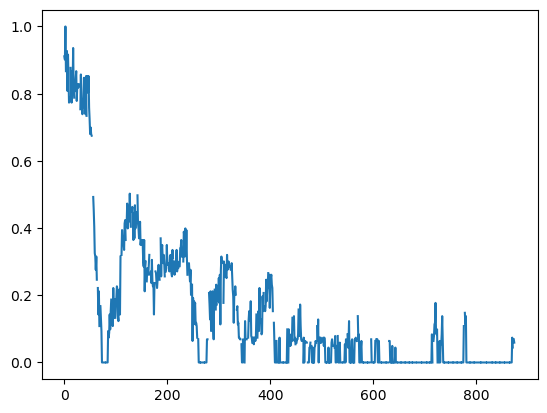

FORCE_C(Left)


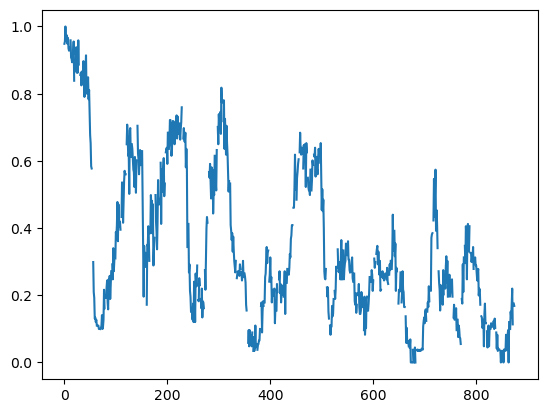

FSR_B(Right)


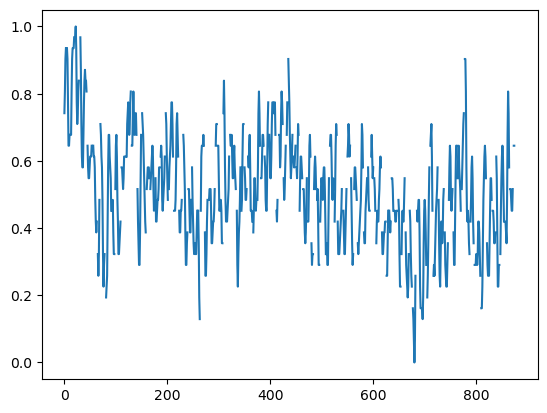

FSR_C(Left)


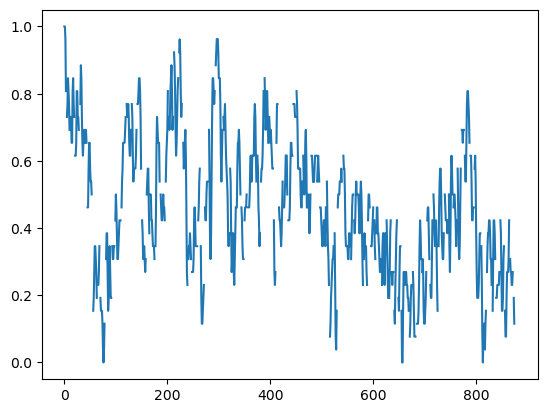

In [201]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [202]:
## R_FORCE_B : FORCE_C(Left)
## R_FORCE_B : FSR_C(Left)

In [203]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.12.04/squat/squat_data_fit_feature.xlsx")





In [204]:
data_sca.columns

Index(['Unnamed: 0', 'FORCE_B(Right)', 'FORCE_C(Left)', 'FSR_B(Right)',
       'FSR_C(Left)'],
      dtype='object')

In [205]:
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)","FSR_B(Right)"],inplace=True)

In [206]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data_sca)
data_saled=pd.DataFrame(data=data_scaled)




R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR_C(Left)']]


<Axes: >

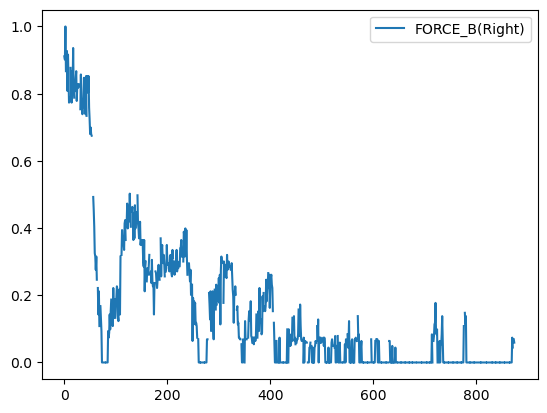

In [207]:
R.plot()

<Axes: >

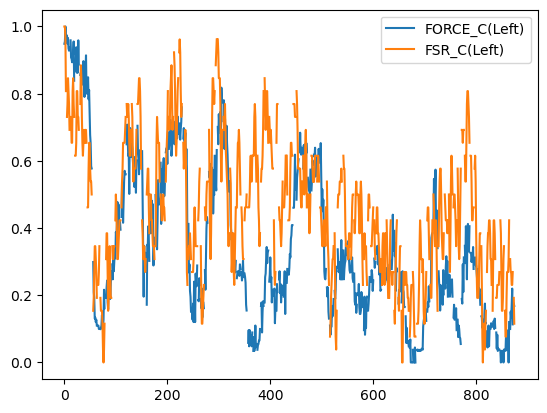

In [208]:
L.plot()

In [209]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [210]:
index=L.index

loss_index_L_FORCE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORCE_C=np.setdiff1d(index,loss_index_L_FORCE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [211]:
## R_FORCE_B : L_XCOR_C
##  R_FORCE_B : L_FSR_C 

In [212]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_FORCE_C=L.iloc[normal_index_L_FORCE_C,0]
x_test_L_FORCE_C=loss_index_L_FORCE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [213]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_FORCE_C.shape)

(760, 1)
(760,)


In [214]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_FORCE_C=x_test_L_FORCE_C.reshape(x_test_L_FORCE_C.shape[0],x_test_L_FORCE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [215]:
print(x_test_L_FORCE_C.shape)
print(x_test_L_FSR_C.shape)

(117, 1, 1)
(117, 1, 1)


In [216]:
#[I 2023-12-05 18:26:36,394] Trial 14 finished with value: 0.02010864260115513 and parameters: {'batch_size': 158, 'steps_per_epoch': 7, 'epochs': 4684, 'filter': 64, 'lstm_par1': 100, 'lstm_par2': 164, 'dense_par': 153, 'dense_par1': 182, 'dense_par2': 121, 'dim1': 3, 'dim2': 8, 'dim3': 3}. Best is trial 13 with value: 0.01958780155802348.
#{'batch_size': 164, 'steps_per_epoch': 8, 'epochs': 4977, 'filter': 57, 'lstm_par1': 101, 'lstm_par2': 168, 'dense_par': 176, 'dense_par1': 183, 'dense_par2': 100, 'dim1': 2, 'dim2': 8, 'dim3': 5}
#0.01958780155802348

In [217]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=57, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(101, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(168, return_sequences=True,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par3, return_sequences=True,dropout=drop3,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par4, return_sequences=True,dropout=drop4,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(176, activation='relu',kernel_initializer = 'uniform',input_dim=2)))
model_cnnbilstm.add(TimeDistributed(Dense(183, activation='relu',kernel_initializer = 'uniform',input_dim=8)))
model_cnnbilstm.add(TimeDistributed(Dense(100, activation='relu',kernel_initializer = 'uniform',input_dim=5)))
#model_cnnbilstm.add(TimeDistributed(Dense(184, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_77 (TimeDi  (None, None, 1, 57)      114       
 stributed)                                                      
                                                                 
 time_distributed_78 (TimeDi  (None, None, 1, 57)      0         
 stributed)                                                      
                                                                 
 time_distributed_79 (TimeDi  (None, None, 57)         0         
 stributed)                                                      
                                                                 
 bidirectional_22 (Bidirecti  (None, None, 202)        128472    
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, None, 336)      

In [218]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FORCE_C,epochs=10000,verbose=2,batch_size=180,steps_per_epoch=4)


Epoch 1/10000


4/4 - 5s - loss: 0.1377 - 5s/epoch - 1s/step
Epoch 2/10000
4/4 - 0s - loss: 0.0763 - 36ms/epoch - 9ms/step
Epoch 3/10000
4/4 - 0s - loss: 0.0922 - 32ms/epoch - 8ms/step
Epoch 4/10000
4/4 - 0s - loss: 0.0613 - 30ms/epoch - 8ms/step
Epoch 5/10000
4/4 - 0s - loss: 0.0577 - 33ms/epoch - 8ms/step
Epoch 6/10000
4/4 - 0s - loss: 0.0450 - 44ms/epoch - 11ms/step
Epoch 7/10000
4/4 - 0s - loss: 0.0378 - 43ms/epoch - 11ms/step
Epoch 8/10000
4/4 - 0s - loss: 0.0301 - 57ms/epoch - 14ms/step
Epoch 9/10000
4/4 - 0s - loss: 0.0337 - 53ms/epoch - 13ms/step
Epoch 10/10000
4/4 - 0s - loss: 0.0326 - 92ms/epoch - 23ms/step
Epoch 11/10000
4/4 - 0s - loss: 0.0308 - 97ms/epoch - 24ms/step
Epoch 12/10000
4/4 - 0s - loss: 0.0303 - 131ms/epoch - 33ms/step
Epoch 13/10000
4/4 - 0s - loss: 0.0297 - 72ms/epoch - 18ms/step
Epoch 14/10000
4/4 - 0s - loss: 0.0291 - 54ms/epoch - 13ms/step
Epoch 15/10000
4/4 - 0s - loss: 0.0280 - 54ms/epoch - 13ms/step
Epoch 16/10000
4/4 - 0s - loss: 0.0314 - 75ms/epoch - 19ms/step
Epoch 

In [219]:
pred=model_cnnbilstm.predict(x_test_L_FORCE_C)
pred=pred.reshape(-1,1)

4/4 [==============================] - 1s 3ms/step


In [220]:
c=0
for i in loss_index_L_FORCE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

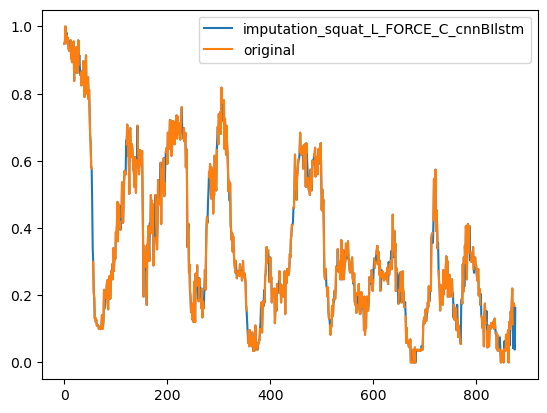

In [221]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_squat_L_FORCE_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [222]:
#[I 2023-12-05 19:30:38,198] Trial 14 finished with value: 0.03334772412906825 and parameters: {'batch_size': 154, 'steps_per_epoch': 8, 'epochs': 3707, 'filter': 172, 'lstm_par1': 127, 'lstm_par2': 168, 'dense_par': 199, 'dense_par1': 180, 'dense_par2': 120, 'dim1': 8, 'dim2': 4, 'dim3': 3, 'dim4': 7}. Best is trial 14 with value: 0.03334772412906825.
#{'batch_size': 154, 'steps_per_epoch': 8, 'epochs': 3707, 'filter': 172, 'lstm_par1': 127, 'lstm_par2': 168, 'dense_par': 199, 'dense_par1': 180, 'dense_par2': 120, 'dim1': 8, 'dim2': 4, 'dim3': 3, 'dim4': 7}


In [223]:
model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=172, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(127, return_sequences=True,activation='relu')))
model_cnnbilstm.add(Bidirectional(LSTM(168, return_sequences=True,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par3, return_sequences=True,dropout=drop3,activation='relu')))
    #model_cnnbilstm.add(Bidirectional(LSTM(lstm_par4, return_sequences=True,dropout=drop4,activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(199, activation='relu',kernel_initializer = 'uniform',input_dim=8)))
model_cnnbilstm.add(TimeDistributed(Dense(180, activation='relu',kernel_initializer = 'uniform',input_dim=4)))
model_cnnbilstm.add(TimeDistributed(Dense(120, activation='relu',kernel_initializer = 'uniform',input_dim=4)))
#model_cnnbilstm.add(TimeDistributed(Dense(184, activation='relu',kernel_initializer = 'uniform',input_dim=7)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_84 (TimeDi  (None, None, 1, 172)     344       
 stributed)                                                      
                                                                 
 time_distributed_85 (TimeDi  (None, None, 1, 172)     0         
 stributed)                                                      
                                                                 
 time_distributed_86 (TimeDi  (None, None, 172)        0         
 stributed)                                                      
                                                                 
 bidirectional_24 (Bidirecti  (None, None, 254)        304800    
 onal)                                                           
                                                                 
 bidirectional_25 (Bidirecti  (None, None, 336)      

In [224]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FSR_C,epochs=10000,verbose=2,batch_size=180,steps_per_epoch=4)

Epoch 1/10000
4/4 - 5s - loss: 0.1525 - 5s/epoch - 1s/step
Epoch 2/10000
4/4 - 0s - loss: 0.3264 - 37ms/epoch - 9ms/step
Epoch 3/10000
4/4 - 0s - loss: 0.1117 - 41ms/epoch - 10ms/step
Epoch 4/10000
4/4 - 0s - loss: 0.2200 - 73ms/epoch - 18ms/step
Epoch 5/10000
4/4 - 0s - loss: 0.1017 - 57ms/epoch - 14ms/step
Epoch 6/10000
4/4 - 0s - loss: 0.2117 - 57ms/epoch - 14ms/step
Epoch 7/10000
4/4 - 0s - loss: 0.1460 - 64ms/epoch - 16ms/step
Epoch 8/10000
4/4 - 0s - loss: 0.2223 - 43ms/epoch - 11ms/step
Epoch 9/10000
4/4 - 0s - loss: 0.1609 - 44ms/epoch - 11ms/step
Epoch 10/10000
4/4 - 0s - loss: 0.1092 - 48ms/epoch - 12ms/step
Epoch 11/10000
4/4 - 0s - loss: 0.1122 - 54ms/epoch - 14ms/step
Epoch 12/10000
4/4 - 0s - loss: 1.4112 - 69ms/epoch - 17ms/step
Epoch 13/10000
4/4 - 0s - loss: 0.3072 - 53ms/epoch - 13ms/step
Epoch 14/10000
4/4 - 0s - loss: 0.1512 - 80ms/epoch - 20ms/step
Epoch 15/10000
4/4 - 0s - loss: 0.1045 - 57ms/epoch - 14ms/step
Epoch 16/10000
4/4 - 0s - loss: 0.0901 - 56ms/epoch - 

In [225]:
pred=model_cnnbilstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

4/4 [==============================] - 1s 2ms/step


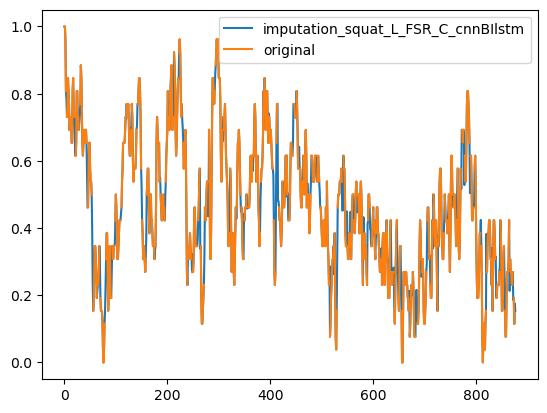

In [226]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_squat_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [227]:
#0.021556504902908485
#0.035785393719726714

In [228]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left)'],L_FORCE_C))
print(RMSE(data_main['FSR_C(Left)'],L_FSR_C))

0.02115399314621855
0.035489859080346915


In [229]:
L.columns

Index(['FORCE_C(Left)', 'FSR_C(Left)'], dtype='object')

In [230]:
L=data.loc[:,['FORCE_C(Left)','FSR_C(Left)']]

In [231]:
L.isnull().sum()

FORCE_C(Left)    117
FSR_C(Left)      117
dtype: int64

In [232]:
for i in loss_index_L_FORCE_C:    
    L['FORCE_C(Left)'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR_C(Left)'][i]=L_FSR_C[i]

In [233]:
L.isnull().sum()

FORCE_C(Left)    0
FSR_C(Left)      0
dtype: int64

<Axes: >

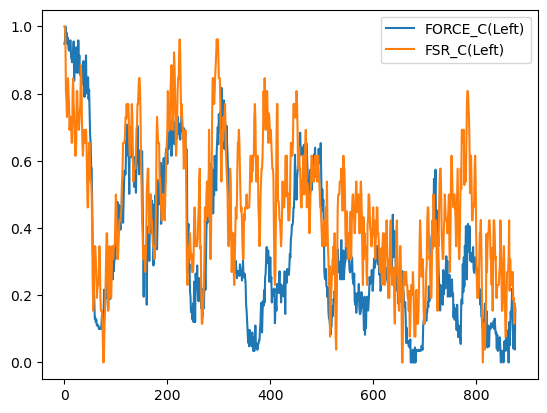

In [234]:
L=L.set_axis(["FORCE_C(Left)","FSR_C(Left)"],axis="columns")
L.plot()

<Axes: >

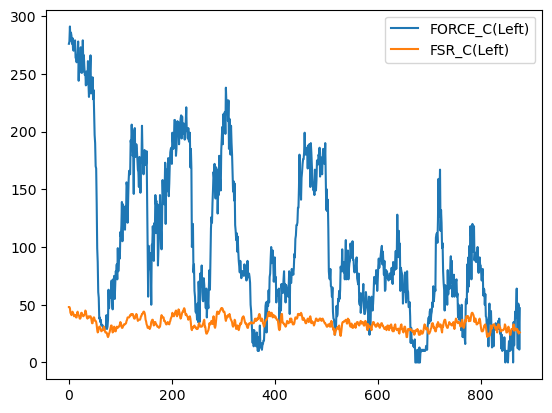

In [235]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR_C(Left)"],axis="columns")
L_sca.plot()